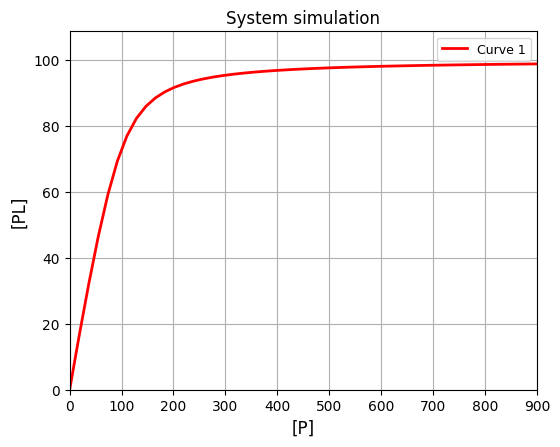

In [1]:
import numpy as np
import pybindingcurve as pbc
my_system = pbc.BindingCurve("1:1")

system_parameters = {"p": np.linspace(0, 900), "l": 100, "kdpl": 10}

my_system.add_curve(system_parameters, name= 'Curve 1')

my_system.show_plot()



In [3]:
pls = []
for x in range(0,900):
    pl = my_system.query({'p':x, 'l':100, 'kdpl':10})
    pls.append(pl)

pls

[mpf('0.0'),
 mpf('0.9083339693685479477607979103314892916520957458389028906848457291568676494818905532021169262576892196221'),
 mpf('1.815131263423734302947782286878170046275947496446475579548973475446188144847159222680044719996518022944'),
 mpf('2.720357011225892668402620915524631844351448442967782226760794594701038317397057855727090934381266296797'),
 mpf('3.62397541966992836318224120622052848341315233838827511374652256606869195857911597290988528429125122165'),
 mpf('4.525949748957273070705852621199897791721388938365194379255551366747507229573357101768325906189729021475'),
 mpf('5.426242287620337913883374873986165827153634025499497421458913968063152644079363736658785506689076874191'),
 mpf('6.324814327115231625665644598879677351896309748408694501120038492237054064244253688553714144709852589891'),
 mpf('7.221626136001528538694704519510309173824195369166450338211691887145790611542484279819593334376698050555'),
 mpf('8.1166369337311670743656679042751342585976208522763266595669150195312

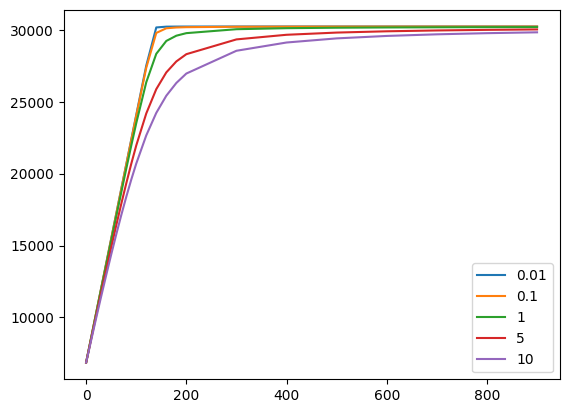

In [4]:
###My own equation
import math
import matplotlib.pyplot as plt
s0 = 6873
sd = 23358
kds = [0.01, 0.1, 1, 5, 10]
L = 100
n = 1.357

def fluo(s0, sd, kd, x, n, L):
    y = s0 + sd*(kd + x/n + L -math.sqrt((kd + x/n + L)**2 -4*x*L/n))/2/L
    return y

xs = [0, 20, 30, 40, 50, 60 , 70, 80, 90, 100, 120, 140, 160, 180, 200, 300, 400, 500, 600, 700, 800, 900]

yss = []
for kd in kds:
    ys = []
    for x in xs:
        y = fluo(s0, sd, kd, x, n, L)
        ys.append(y)
    yss.append(ys)
    plt.plot(xs, ys, label = str(kd))

workdir = '/mnt/e/'
with open(workdir + 'stimulated.txt', 'w') as f:
    for ys in yss:
        f.write('\t'.join([str(y) for y in ys]) + '\n')
# xs = [0, 20, 40, 50, 60 , 70, 80, 90, 100, 120, 140, 160, 180, 200, 300, 400, 500, 600, 700, 800, 900]

# ys = [8500.75,
# 10701.25,
# 14939,
# 17186.75,
# 18932.25,
# 21071,
# 20824.25,
# 22696.5,
# 24332.75,
# 25977.5,
# 30287,
# 32798.25,
# 33472,
# 33404,
# 31242.5,
# 30739.75,
# 31591.75,
# 30653.5,
# 31039.75,
# 30325.75,
# 30689.5
# ]
# plt.plot(xs, ys, label = 'real')

plt.legend()
plt.show()
    

